# 02.01 데이터 전처리 기초


    - missingno 패키지: 결측 데이터 검색
    - sklearn.impute 패키지: 결측 데이터 대체
    - patsy 패키지: 데이터 선택, 변환, 추가, 스케일링
    - sklearn.preprocessing 패키지: 스케일링, 변환

## 1. missingno 패키지

    - 결측 데이터 검색

### 0) 결측치 확인 - 데이터프레임.isnull()

In [1]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [7]:
df.dtypes

x1             Int64
x2           float64
x3           float64
x4    datetime64[ns]
x5            object
dtype: object

In [8]:
# 결측 데이터 현황 파악

df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [9]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

### 1) 결측치 확인 - missingno 패키지 활용

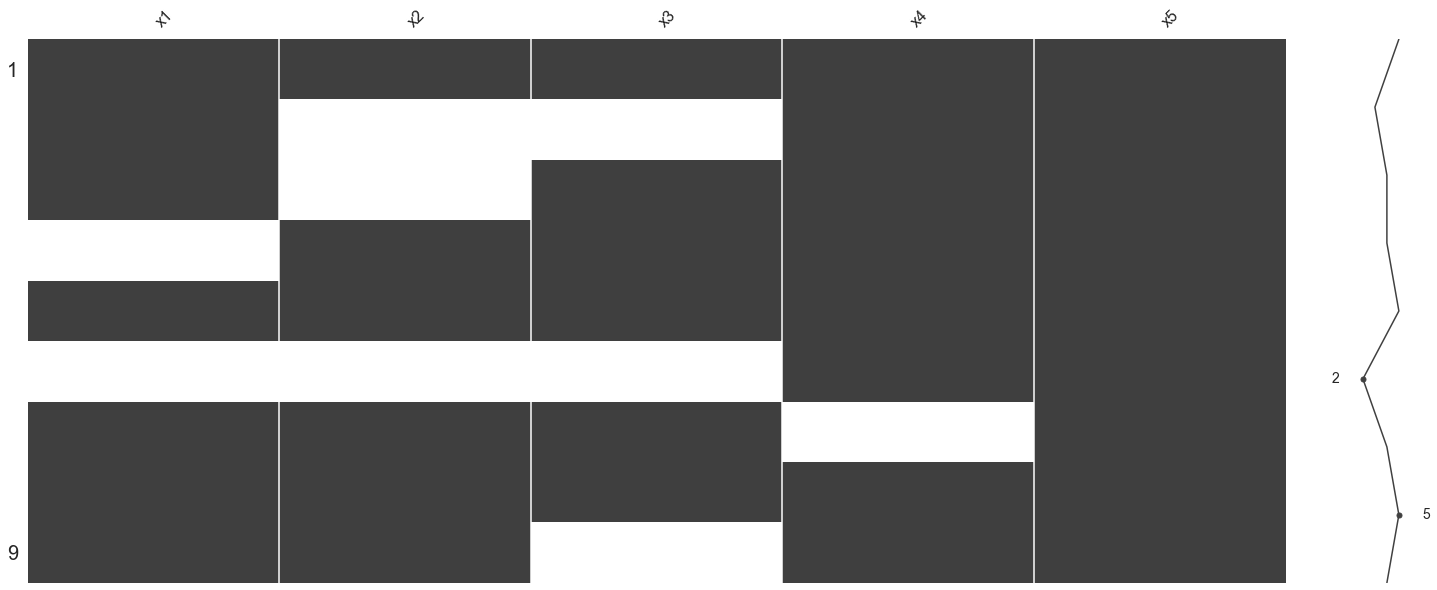

In [11]:
# missingno 패키지 활용한 결측치 파악

import missingno as msno

msno.matrix(df)

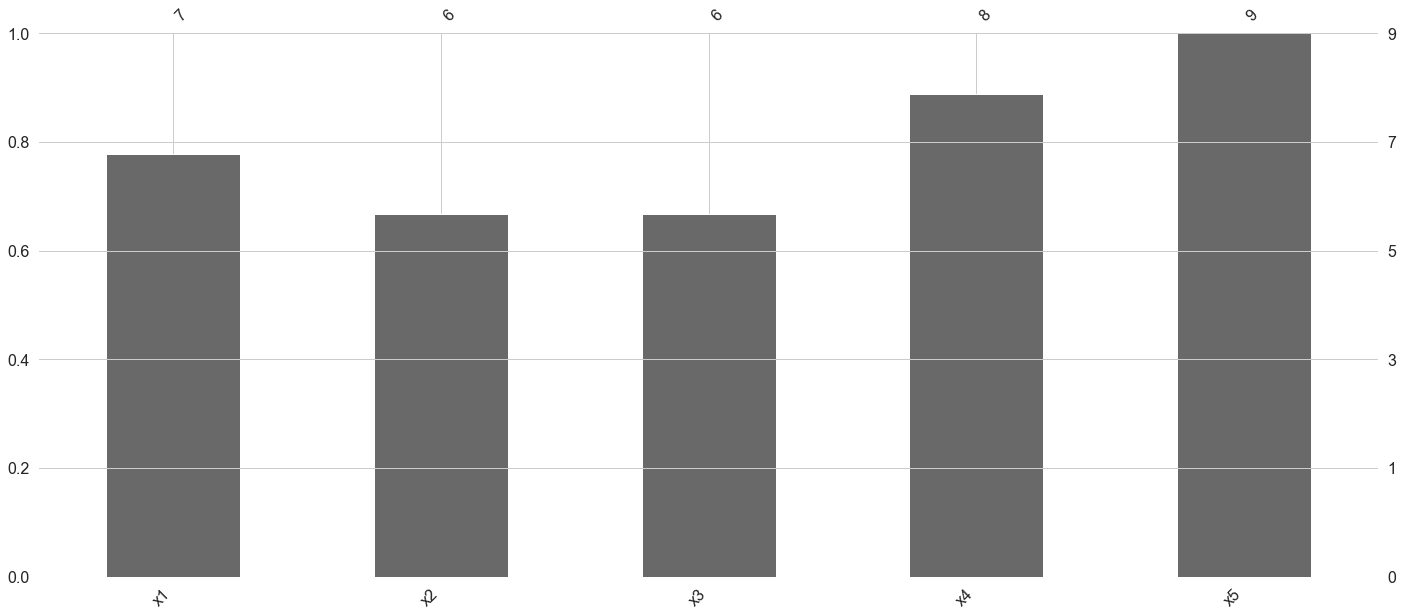

In [12]:
msno.bar(df)

### 2) 결측치 확인 - missingno 패키지 활용 (타이타닉 예제)

In [62]:
# 타이타닉 데이터에서의 missingno

titanic = sns.load_dataset("titanic")
titanic.shape

(891, 15)

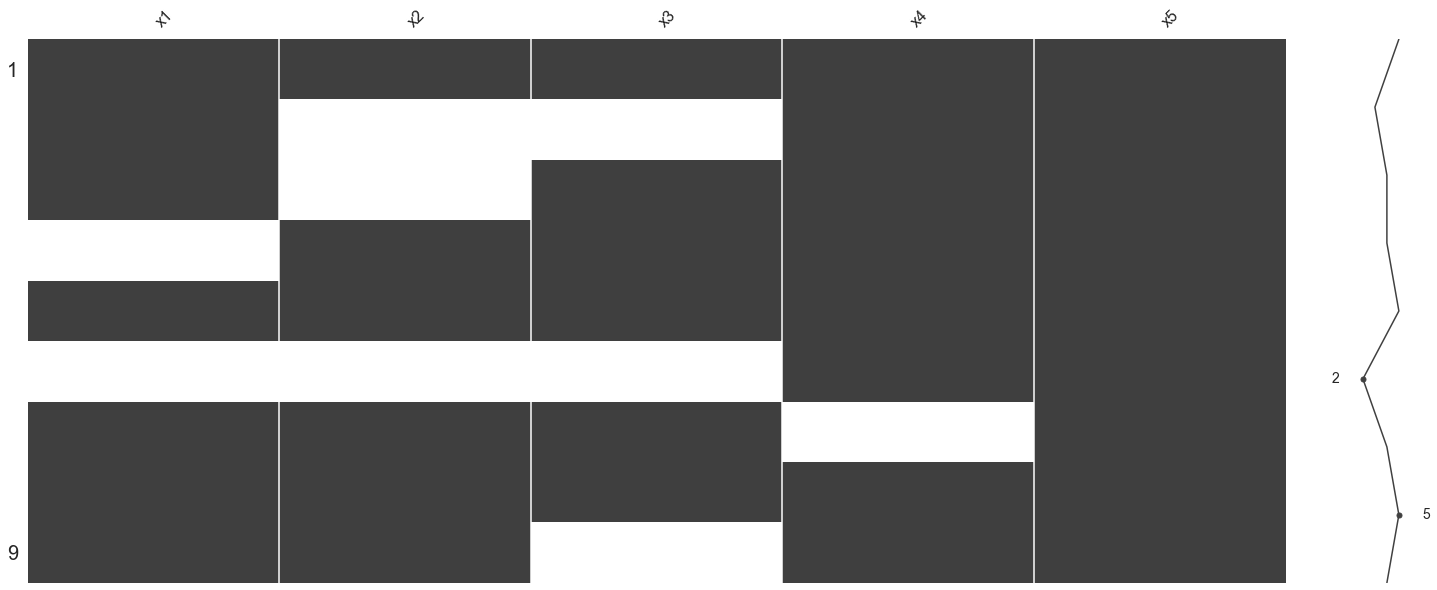

In [63]:
msno.matrix(df)

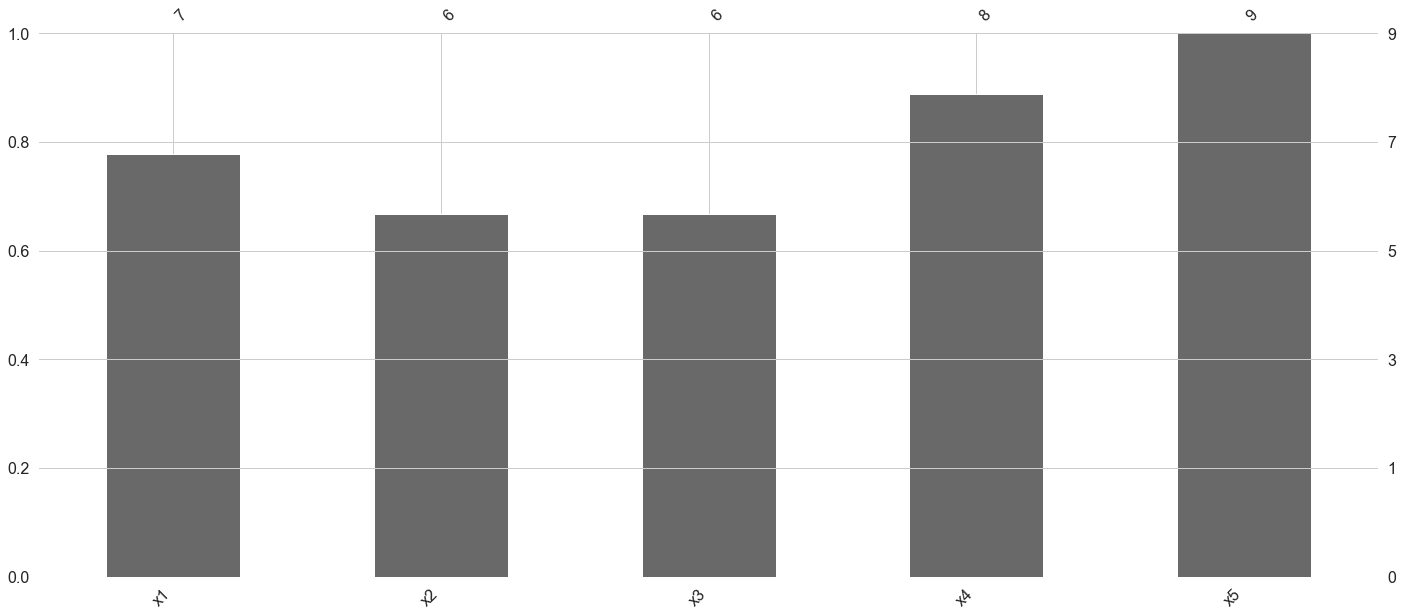

In [64]:
msno.bar(df)

### 3) 결측치 처리

    - 결측 데이터 존재 열 삭제 (dropna)
    - 결측치 대체 (scikit-learn SimpleImputer 패키지)
    

### 3-1) 결측치 처리 : 열 삭제

In [65]:
# 결측 데이터 존재 열 삭제 dropna

df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [66]:
df.dropna(axis=1,thresh=7)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


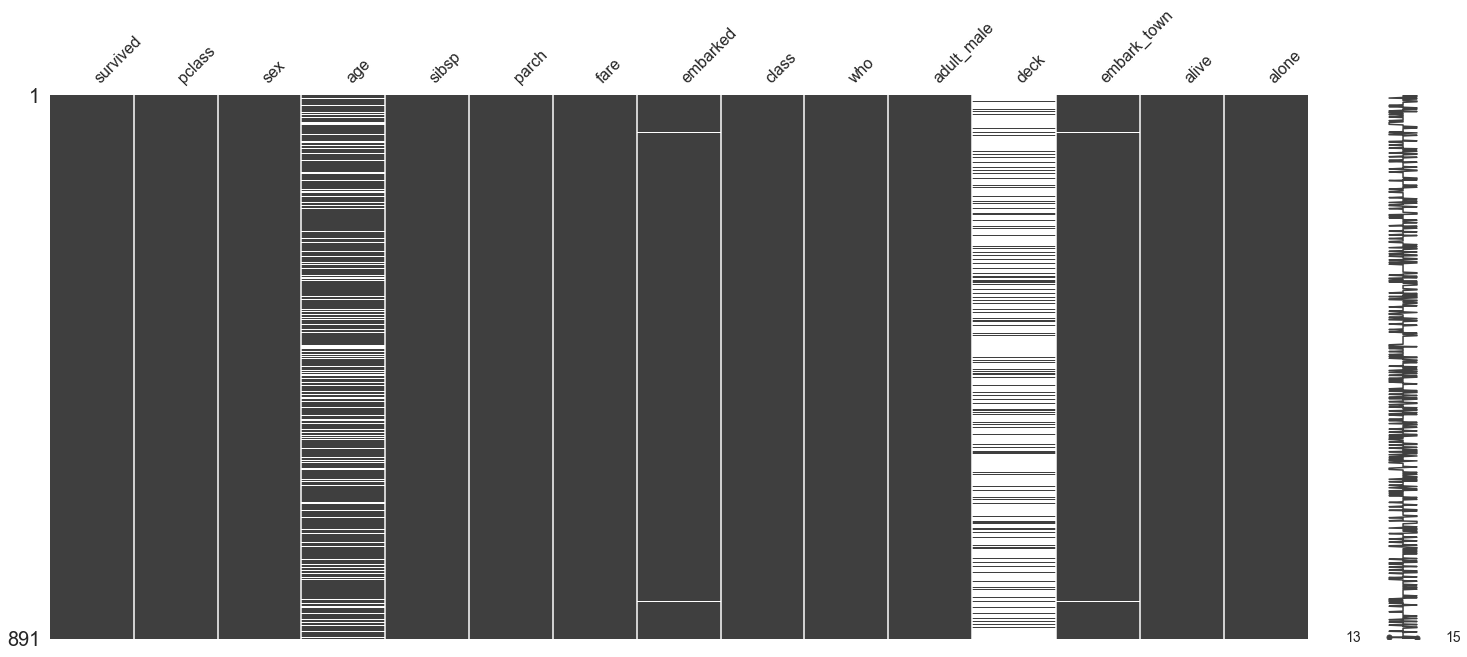

In [67]:
# thresh 인수 활용 - titanic 데이터에서 비결측치가 50% 미만이면 열 삭제

msno.matrix(titanic)

In [68]:
# 15개 컬럼 중, deck 컬럼 제거됨 (50% 이상 결측치 존재)
titanic = titanic.dropna(axis=1,thresh = len(titanic)*0.5)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### 3-2) 결측치 처리 : 대체 (imputation)

    - sckit-learn, SimpleImputer 클래스 사용
    
    - 데이터가 실수 연속값인 경우에는 평균 또는 중앙값을 사용할 수 있다. 
    - 값의 분포가 대칭적이면 평균이 좋고 값의 분포가 심하게 비대칭인 경우에는 중앙값이 적당하다.
    - 데이터가 범주값이거나 정수값인 경우에는 최빈값을 사용할 수 있다.

### 3-3) 결측치 처리 : 타이타닉 예제 (1)
    - 최빈값 대체 : 범주형 데이터

In [69]:
titanic.tail(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [70]:
from sklearn.impute import SimpleImputer

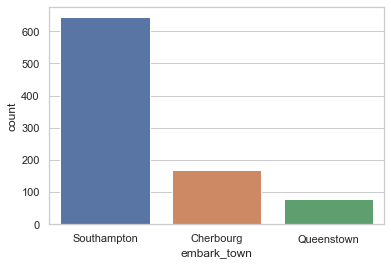

In [71]:
# 대체하기 전 embark_town 분포
sns.countplot(x=titanic.embark_town)

In [72]:
# SimpleImputer 클래스로 결측치 대체
imputer_embark_town = SimpleImputer(strategy = 'most_frequent')
titanic.embark_town = imputer_embark_town.fit_transform(titanic[['embark_town']])
titanic.embarked = imputer_embark_town.fit_transform(titanic[['embarked']])

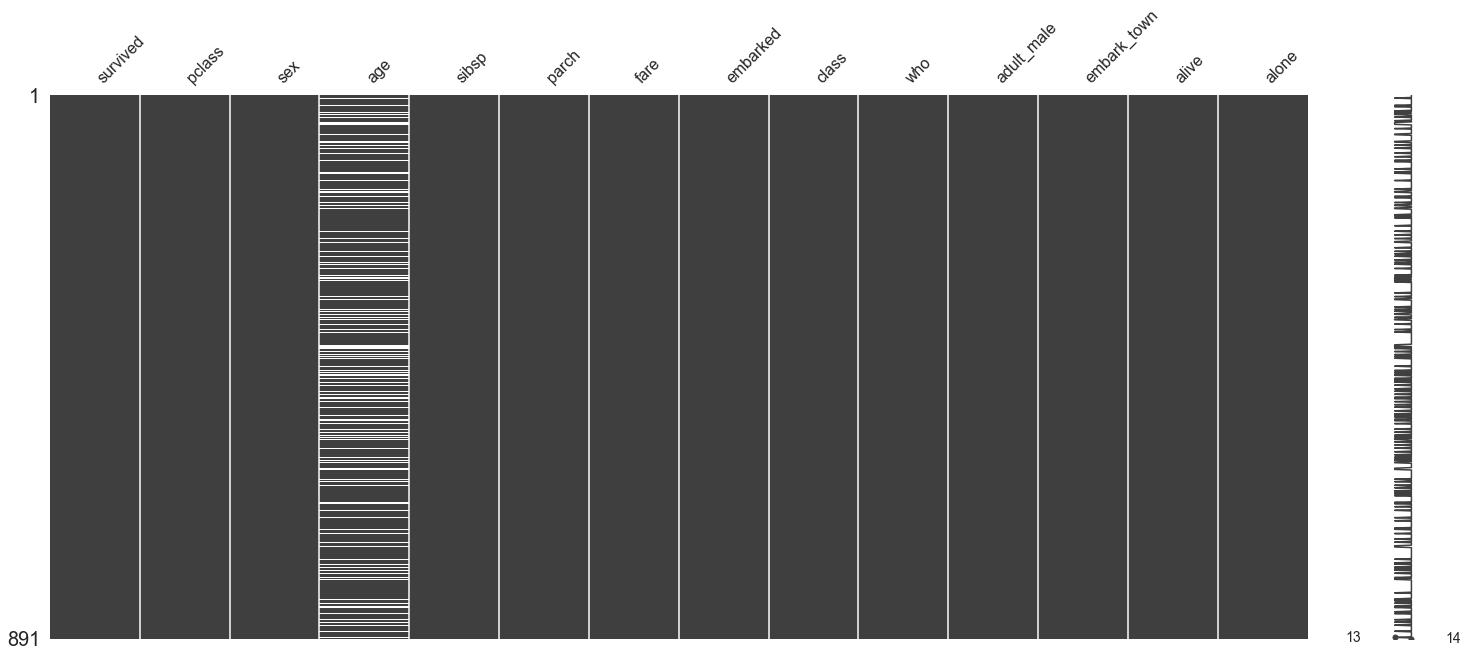

In [73]:
msno.matrix(titanic)

### 3-3) 결측치 처리 : 타이타닉 예제 (2)
    - 실수 + 비대칭 분포 : 중앙값 대체

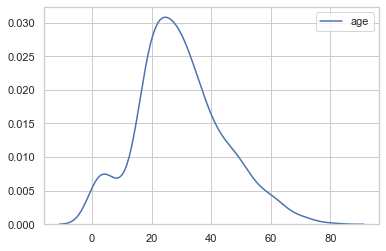

In [74]:
# age데이터는 (-)왜도의 비대칭 데이터 -> 결측치는 중앙값으로 대체

sns.kdeplot(titanic.age)

In [75]:
# strategy = median으로 imputer 객체 생성

imputer_age = SimpleImputer(strategy='median')
titanic.age = imputer_age.fit_transform(titanic[['age']])

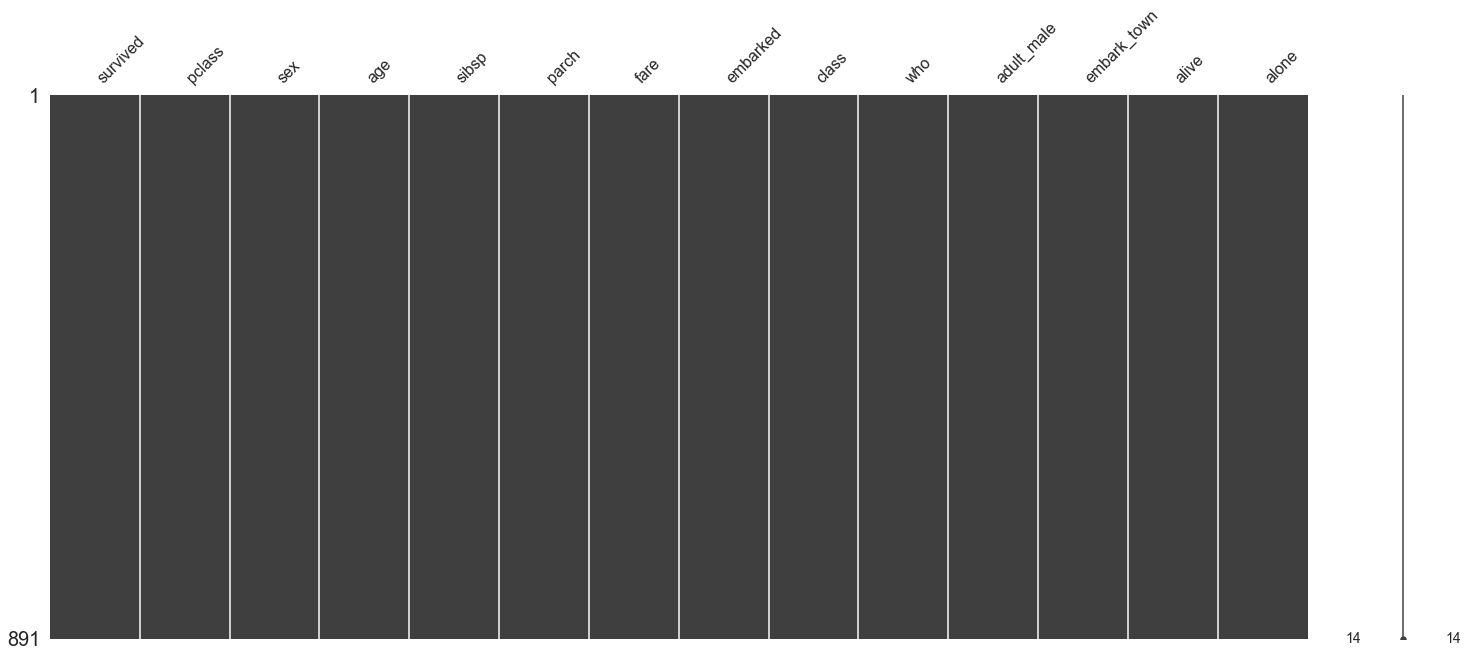

In [76]:
msno.matrix(titanic)

## 2. patsy 패키지

    - 데이터 가공
    - dmatrix ==>> 기존의 데이터프레임 안에서 열을 조합해서 가공시켜줌

In [80]:
# patsy의 demo_data 함수로 예제 데이터 생성

from patsy import demo_data
from patsy import dmatrix

df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [81]:
dmatrix('x1 + 0',df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [82]:
dmatrix('x1 + 1',df)

DesignMatrix with shape (5, 2)
  Intercept       x1
          1  1.76405
          1  0.40016
          1  0.97874
          1  2.24089
          1  1.86756
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)

In [83]:
dmatrix('x1 + x2 + x3 + 0',df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [84]:
dmatrix('x1 + x2 + x3',df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [85]:
dmatrix('x1 + np.log(np.abs(x2))',df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [86]:
def times(x):
    return x*10

dmatrix('x1 + times(x2)',df)

DesignMatrix with shape (5, 3)
  Intercept       x1  times(x2)
          1  1.76405   -9.77278
          1  0.40016    9.50088
          1  0.97874   -1.51357
          1  2.24089   -1.03219
          1  1.86756    4.10599
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'times(x2)' (column 2)

In [88]:
# 상호작용항 생성

dmatrix('x1 + x2 + x1:x2',df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2     x1:x2
          1  1.76405  -0.97728  -1.72397
          1  0.40016   0.95009   0.38018
          1  0.97874  -0.15136  -0.14814
          1  2.24089  -0.10322  -0.23130
          1  1.86756   0.41060   0.76682
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [89]:
dmatrix('x1 + x2 + I(x1+x2)',df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2  I(x1 + x2)
          1  1.76405  -0.97728     0.78677
          1  0.40016   0.95009     1.35025
          1  0.97874  -0.15136     0.82738
          1  2.24089  -0.10322     2.13767
          1  1.86756   0.41060     2.27816
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'I(x1 + x2)' (column 3)

### 2-1) 스케일링
    
    - center(): 평균을 0으로 스케일링
    - standardize(): 평균을 0으로하고 표준편차를 1로 스케일링
    - scale(): standardize() 과 같음
    

In [110]:
# 평균 0 으로 스케일링

dm = dmatrix('center(x1)',df)
dm = pd.DataFrame(dm,columns=['a','b'])
dm['b'].mean()

-8.881784197001253e-17

In [113]:
dm = dmatrix('center(x1)',df)
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

## 3. sklearn.preprocessing 패키지

    - StandardSclaer, RobustScaler, PolynomialFeatures, FunctionTransformer

### 3-1) StandardScaler -> 0 주위 분포로 스케일링 (분산 1)

    - 평균 0, 분산 1

In [119]:
x = np.arange(7).reshape(-1,1)
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X,X.mean(),sep='\n')

[[-1.5]
 [-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]
 [ 1.5]]
0.0


### 3-2) RobustScaler -> 아웃라이어 존재 시 0 주위 분포로 스케일링 (IQR 1)

    - 중앙값 0, IQR 1

    - IQR = interquartile range, Q1과 Q3 사이의 구간
    - IQR = 50% 데이터 분포
    
    - Q1 : 중앙값 아래에서의 중앙값
    - Q3 : 중앙값 위에서의 중앙값
    - 따라서, 4개의 구간 생성
        ~ Q1 : 25%
        Q1 - median : 누적 50%
        median - Q3 : 누적 75%
        Q3 ~ : 누적 100%

[IQR 설명 블로그글](https://m.blog.naver.com/PostView.nhn?blogId=sw4r&logNo=221021173204&proxyReferer=https:%2F%2Fwww.google.com%2F)

In [142]:
x2 = np.vstack([x,[[1000]]])
x2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [144]:
x2.mean()

127.625

In [157]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X2 = scaler.fit_transform(x2)
X2

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

### 3-3) PolynomialFeatures

    - degree만큼 승수를 적용해 변환

In [160]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.  , -1.5 ,  2.25],
       [ 1.  , -1.  ,  1.  ],
       [ 1.  , -0.5 ,  0.25],
       [ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.5 ,  2.25]])

### 3-4) FunctionTransformer

    - 사용자가 지정한 함수를 적용해 변환

In [161]:
X = 90 * np.arange(9).reshape(-1, 1) 
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

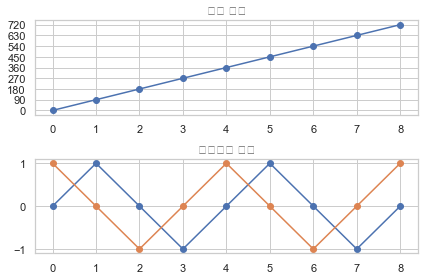

In [166]:
# 삼각함수인 경우, 0도 - 360도 - 720도는 함수값이 같은 함수값이 나와야 함
# 이를 위해 삼각함수로 인식하게끔 변환 함수를 적용함

from sklearn.preprocessing import FunctionTransformer

def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0, x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker="o")
plt.yticks(X.flatten())
plt.title("각도 표현")
plt.subplot(212)
plt.plot(X2, marker="o")
plt.title("삼각함수 표현")
plt.tight_layout()
plt.show()